In [2]:
import os
import scipy.io
import numpy as np
from scipy import signal
data_path = "/kaggle/input/control1"
lowcut = 0.4 
highcut = 100 
fs_original = 500
fs_new = 250

control_data = []
control_path = os.path.join(data_path, 'Control')

for foldername in os.listdir(control_path):
    subfolder_path = os.path.join(control_path, foldername)
    control_data.append(subfolder_path)

Control30 = []

for control_data_path in control_data:
    n_epochs = 70 
    start_epoch = 35
    end_epoch = 70
    control_arr = []

    for i in range(start_epoch, end_epoch+1):
        epoch_path = os.path.join(control_data_path, f"trial{i}.mat")
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]        
        # Downsampling
        num_samples_original = mat_data1.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(mat_data1, num_samples_new, axis=-1)
        
        control_arr.append(np.array(downsampled_data))
        
    Control30.append(np.array(control_arr))

Control30 = np.array(Control30)
print(Control30[0].shape)

(36, 60, 1000)


In [3]:
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy

delta_band = (0.5, 4)
alpha_band = (8, 12)
beta_band = (12, 35)

all_control_power = []
scaler = MinMaxScaler()
epsilon = 1e-10

# Normalizing the features
for i in range(len(Control30)):
    control_data = Control30[i]
    control_power = []
    for epoch in control_data:
        epoch_power = []
        for channel_data in epoch:
            freq_spectrum = np.fft.fft(channel_data)
            power_spectrum = np.abs(freq_spectrum) ** 2

            alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
            beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
            delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

            channel_min_value = np.min(channel_data)
            channel_max_value = np.max(channel_data)
            power_spectrum_adjusted = power_spectrum + epsilon
            entropy_values = entropy(power_spectrum_adjusted)
            values=np.array([alpha_power,beta_power,delta_power,entropy_values])
            rescaled_values = (values - values.min()) * (channel_max_value - channel_min_value) / (values.max() - values.min()) + channel_min_value
            concatenated_data = np.concatenate((channel_data, rescaled_values))
            epoch_power.append(concatenated_data.tolist())

        control_power.append(np.array(epoch_power))

    all_control_power.append(np.array(control_power))

all_control_power = np.array(all_control_power)
print(all_control_power.shape)
print(len(Control30))


(30, 36, 60, 1004)
30


In [4]:
import os
import scipy.io
import numpy as np
from scipy import signal
data_path = "/kaggle/input/concussed1"
lowcut = 0.4 
highcut = 100 
fs_original = 500
fs_new = 250  

concussed_data = []
concussed_path = os.path.join(data_path, 'Concussed')
for foldername in os.listdir(concussed_path):
    subfolder_path = os.path.join(concussed_path, foldername)
    concussed_data.append(subfolder_path)

Concussed52 = []
for concussed_data_path in concussed_data:
    n_epochs = 70
    start_epoch = 35
    end_epoch = 70
    concussed_arr = []

    for i in range(start_epoch, end_epoch+1):
        epoch_path = f"{concussed_data_path}/trial{i}.mat"
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]
        num_samples_original = mat_data1.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(mat_data1, num_samples_new, axis=-1)
        
        concussed_arr.append(np.array(downsampled_data))
        
    Concussed52.append(np.array(concussed_arr))

Concussed52 = np.array(Concussed52)
print( Concussed52[0].shape)

(36, 60, 1000)


In [5]:
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy

delta_band = (0.5, 4)
alpha_band = (8, 12)
beta_band = (12, 35)

all_concussed_power = []
scaler = MinMaxScaler()
epsilon = 1e-10

for i in range(len(Concussed52)):
    concussed_data = Concussed52[i]
    concussed_power = []
    for epoch in concussed_data:
        epoch_power = []
        for channel_data in epoch:
            freq_spectrum = np.fft.fft(channel_data)
            power_spectrum = np.abs(freq_spectrum) ** 2

            alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
            beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
            delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

            channel_min_value = np.min(channel_data)
            channel_max_value = np.max(channel_data)
            power_spectrum_adjusted = power_spectrum + epsilon
            entropy_values = entropy(power_spectrum_adjusted)
            values=np.array([alpha_power,beta_power,delta_power,entropy_values])
            rescaled_values = (values - values.min()) * (channel_max_value - channel_min_value) / (values.max() - values.min()) + channel_min_value
            concatenated_data = np.concatenate((channel_data, rescaled_values))
            epoch_power.append(concatenated_data.tolist())

        concussed_power.append(np.array(epoch_power))

    all_concussed_power.append(np.array(concussed_power))

all_concussed_power = np.array(all_concussed_power)
print(all_concussed_power.shape)
print(len(Concussed52))


(49, 36, 60, 1004)
49


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
data_combined = np.concatenate((all_control_power, all_concussed_power), axis=0)

control_labels = np.zeros(all_control_power.shape[0])
concussed_labels = np.ones(all_concussed_power.shape[0])
labels_combined = np.concatenate((control_labels, concussed_labels))

x_train_val, x_test, y_train_val, y_test = train_test_split(data_combined, labels_combined, test_size=0.2, stratify=labels_combined, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)
scaler = MinMaxScaler()

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
x_train_normalized = scaler.fit_transform(x_train_flat)
x_val_normalized = scaler.transform(x_val_flat)
x_test_normalized = scaler.transform(x_test_flat)

x_train_normalized = x_train_normalized.reshape(x_train.shape)
x_val_normalized = x_val_normalized.reshape(x_val.shape)
x_test_normalized = x_test_normalized.reshape(x_test.shape)
print("x_train shape:", x_train_normalized.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val_normalized.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test_normalized.shape)
print("y_test shape:", y_test.shape)


x_train shape: (50, 36, 60, 1004)
y_train shape: (50,)
x_val shape: (13, 36, 60, 1004)
y_val shape: (13,)
x_test shape: (16, 36, 60, 1004)
y_test shape: (16,)


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from keras import regularizers
x_train_reshaped = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_reshaped = x_test_normalized.reshape(x_test_normalized.shape[0], -1)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)
x_test_scaled = scaler.transform(x_test_reshaped)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
x_train_scaled = x_train_scaled.reshape(x_train_normalized.shape[0], x_train_normalized.shape[1], -1)
x_test_scaled = x_test_scaled.reshape(x_test_normalized.shape[0], x_test_normalized.shape[1], -1)
n_splits = 4

kf = KFold(n_splits=n_splits, shuffle=True)

loss_scores = []
accuracy_scores = []
all_predictions = []
all_true_labels = []

for train_index, val_index in kf.split(x_train_scaled):
    x_train_fold, x_val_fold = x_train_scaled[train_index], x_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)),
                            input_shape=(x_train_normalized.shape[1], x_train_scaled.shape[2])))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(units=256, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(units=128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dropout(0.5))
    model.add(Bidirectional(GRU(units=64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dropout(0.5))
    model.add(Bidirectional(GRU(units=32, kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dropout(0.5))
    model.add(Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(units=2, activation='softmax'))

    learning_rate = 0.0006
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(x_train_fold, y_train_fold, validation_data=(x_val_fold, y_val_fold),
                        epochs=200, batch_size=128, callbacks=[early_stopping], verbose=0)
    loss, accuracy = model.evaluate(x_val_fold, y_val_fold)
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)
    
    val_predictions = model.predict(x_val_fold)
    val_predicted_labels = np.argmax(val_predictions, axis=1)
    val_true_labels = np.argmax(y_val_fold, axis=1)
    all_predictions.extend(val_predicted_labels)
    all_true_labels.extend(val_true_labels)
loss, accuracy = model.evaluate(x_test_scaled, y_test_categorical)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

test_predictions = model.predict(x_test_scaled)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(y_test_categorical, axis=1)

cm_test = confusion_matrix(test_true_labels, test_predicted_labels)
print('Confusion Matrix (Test):')
print(cm_test)
class_report_test = classification_report(test_true_labels, test_predicted_labels)
print('Classification Report (Test):')
print(class_report_test)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

1/1 [==============================] - 1s 1s/step - loss: 1.9052 - accuracy: 0.7500
Test loss: 1.905238151550293
Test accuracy: 0.75
1/1 [==============================] - 2s 2s/step
Confusion Matrix (Test):
[[3 3]
 [1 9]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.75      0.90      0.82        10

    accuracy                           0.75        16
   macro avg       0.75      0.70      0.71        16
weighted avg       0.75      0.75      0.74        16



In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


y_pred_probs = model.predict(x_test_scaled)

y_pred = np.argmax(y_pred_probs, axis=1)

y_test_single = np.argmax(y_test_categorical, axis=1)

cm = confusion_matrix(y_test_single, y_pred)

report = classification_report(y_test_single, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


1/1 [==============================] - 2s 2s/step
Confusion Matrix:
[[3 3]
 [1 9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.75      0.90      0.82        10

    accuracy                           0.75        16
   macro avg       0.75      0.70      0.71        16
weighted avg       0.75      0.75      0.74        16



In [19]:
TP = 3
FN = 3
FP = 1
TN = 9

Precision = TP / (TP + FP)
Sensitivity = TP / (TP + FN)
Specificity = TN /(TN + FP)
False_Pos_Rate = FP / (TN + FP)
False_Neg_Rate = FN / (FN + TP)
F1_Score = (2*Precision*Sensitivity) / (Precision + Sensitivity)
Accuracy = (TP+TN) / (TP+FP+TN+FN)

precision = "{:.2f}".format(Precision)
sensitivity = "{:.2f}".format(Sensitivity)
specificity = "{:.2f}".format(Specificity)
false_pos_rate = "{:.2f}".format(False_Pos_Rate)
false_neg_rate = "{:.2f}".format(False_Neg_Rate)
f1_score = "{:.2f}".format(F1_Score)
accuracy = "{:.2f}".format(Accuracy)

print("Precision          :", precision)
print("Sensitivity        :", sensitivity)
print("Specificity        :", specificity)
print("F1-Score           :", f1_score)
print("False Positive Rate:", false_pos_rate)
print("False Negative Rate:", false_neg_rate)
print("Accuraccy          :", accuracy)

Precision          : 0.75
Sensitivity        : 0.50
Specificity        : 0.90
F1-Score           : 0.60
False Positive Rate: 0.10
False Negative Rate: 0.50
Accuraccy          : 0.75


In [20]:
from tabulate import tabulate

data = [["Precision", 0.75], 
        ["Sensitivity", 0.50], 
        ["Specificity", 0.90], 
        ["F1-Score", 0.60],
        ["False Positive Rate", 0.10],
        ["False Negative Rate", 0.50],
        ["Accuraccy",0.75 ]]

col_names = ["Performance Metrics", "Result"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))
  
     


╒═══════════════════════╤══════════╕
│ Performance Metrics   │   Result │
╞═══════════════════════╪══════════╡
│ Precision             │     0.75 │
├───────────────────────┼──────────┤
│ Sensitivity           │     0.5  │
├───────────────────────┼──────────┤
│ Specificity           │     0.9  │
├───────────────────────┼──────────┤
│ F1-Score              │     0.6  │
├───────────────────────┼──────────┤
│ False Positive Rate   │     0.1  │
├───────────────────────┼──────────┤
│ False Negative Rate   │     0.5  │
├───────────────────────┼──────────┤
│ Accuraccy             │     0.75 │
╘═══════════════════════╧══════════╛


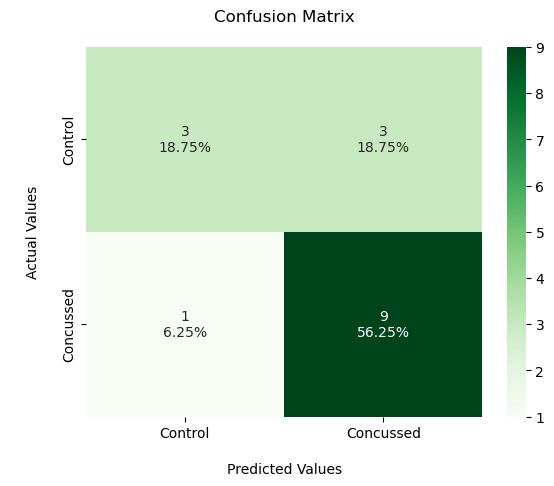

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, fmt = '' ,annot=labels, cmap = 'Greens')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');

ax.xaxis.set_ticklabels(['Control','Concussed'])
ax.yaxis.set_ticklabels(['Control','Concussed'])

plt.show()
     
